<a href="https://colab.research.google.com/github/rajendranast012-stack/in-silico-lab1/blob/main/tinamoto_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/codetodiscovery/Tanimoto-similarity/blob/main/Tanimoto_Similarity.ipynb
references

In [1]:
!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 43.7 MB/s eta 0:00:00


In [2]:

# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem, PandasTools, MACCSkeys
from rdkit import DataStructs
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

from collections import Counter
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [3]:
df= pd.read_excel('/content/flavonoid_smile.xlsx')
df.head()

,common,SMILES
0,quercetin,Oc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)c(O)c3)O
1,wogonin,COc1c(O)cc(O)c2C(=O)C=C(Oc12)c3ccccc3
2,Rhamnocitrin,COc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)cc3)O
3,dehydrodiisoeugenol,COc1cc(ccc1O)C2Oc3c(OC)cc(\C=C/C)cc3C2C
4,Rhamnazin,COc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)c(OC)c3)O


In [4]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df,'SMILES','mol')
df.head()

,common,SMILES,mol
0,quercetin,Oc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)c(O)c3)O,<rdkit.Chem.rdchem.Mol object at 0x7ad00b1ef760>
1,wogonin,COc1c(O)cc(O)c2C(=O)C=C(Oc12)c3ccccc3,<rdkit.Chem.rdchem.Mol object at 0x7acff2c37a70>
2,Rhamnocitrin,COc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)cc3)O,<rdkit.Chem.rdchem.Mol object at 0x7acff2c37b50>
3,dehydrodiisoeugenol,COc1cc(ccc1O)C2Oc3c(OC)cc(\C=C/C)cc3C2C,<rdkit.Chem.rdchem.Mol object at 0x7acff2c37ae0>
4,Rhamnazin,COc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)c(OC)c3)O,<rdkit.Chem.rdchem.Mol object at 0x7acff2c37990>


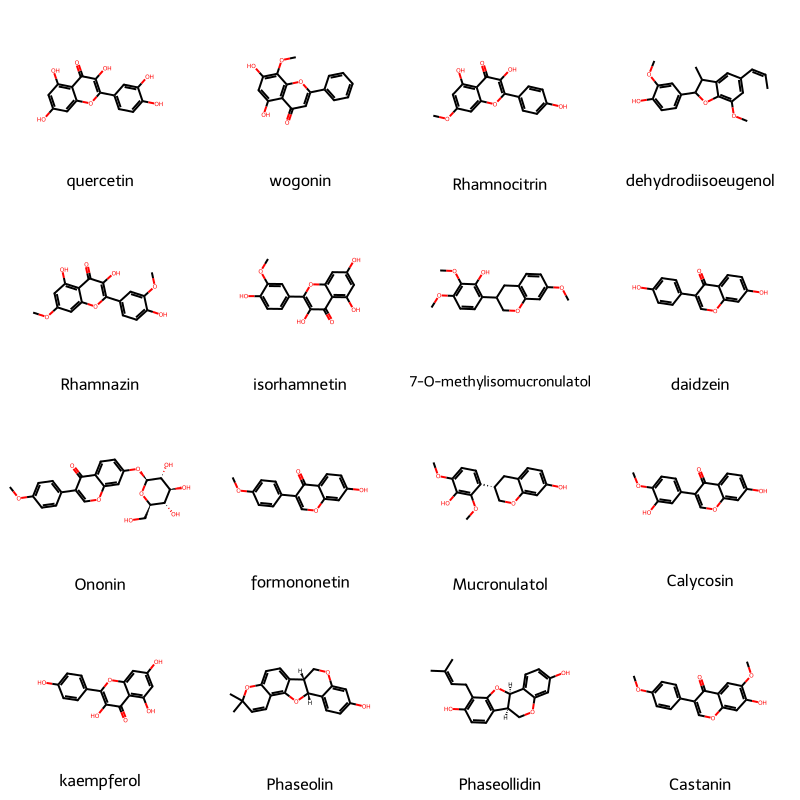

In [6]:
Draw.MolsToGridImage(df['mol'][:16],molsPerRow=4,subImgSize=(200,200),legends=[x for x in df['common'][:16]])


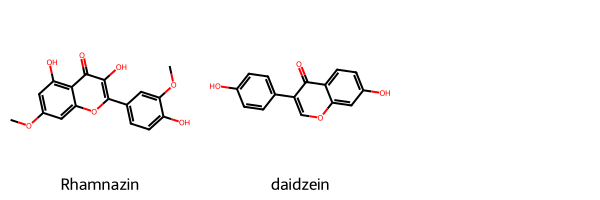

In [8]:
Draw.MolsToGridImage(df['mol'][4:8:3],molsPerRow=3,subImgSize=(200,200),legends=[x for x in df['common'][4:8:3]])


In [9]:
mf_ba = AllChem.GetMorganFingerprintAsBitVect(df['mol'][4], radius=2, nBits = 2048)
mf_pe = AllChem.GetMorganFingerprintAsBitVect(df['mol'][7], radius=2, nBits = 2048)

[17:33:59] DEPRECATION WARNING: please use MorganGenerator
[17:33:59] DEPRECATION WARNING: please use MorganGenerator


In [10]:

# print the position and number of On bits
print(f'The bits are on at position {list(mf_ba.GetOnBits())}')
print(Counter(np.array(mf_ba)))

The bits are on at position [36, 54, 202, 249, 285, 314, 322, 501, 525, 614, 650, 656, 695, 745, 781, 807, 841, 845, 875, 896, 897, 1057, 1160, 1168, 1195, 1218, 1242, 1380, 1475, 1536, 1602, 1604, 1607, 1609, 1750, 1803, 1808, 1873, 1970, 1984, 2028]
Counter({np.int64(0): 2007, np.int64(1): 41})


In [11]:
# print the position and number of On bits
print(f'The bits are on at position {list(mf_pe.GetOnBits())}')
print(Counter(np.array(mf_pe)))

The bits are on at position [222, 304, 314, 352, 381, 384, 465, 472, 525, 650, 656, 690, 745, 807, 875, 896, 941, 1160, 1233, 1261, 1313, 1357, 1380, 1602, 1733, 1750, 1778, 1808, 1873, 2041]
Counter({np.int64(0): 2018, np.int64(1): 30})


In [12]:
set(mf_ba.GetOnBits()) & set(mf_pe.GetOnBits())

{314, 525, 650, 656, 745, 807, 875, 896, 1160, 1380, 1602, 1750, 1808, 1873}

In [13]:


len(set(mf_ba.GetOnBits()) & set(mf_pe.GetOnBits()))

14

In [14]:
print(set(mf_ba.GetOnBits()) | set(mf_pe.GetOnBits()))
len(set(mf_ba.GetOnBits()) | set(mf_pe.GetOnBits()))

{896, 897, 1536, 384, 1160, 650, 1803, 525, 781, 656, 1168, 1808, 285, 2041, 1057, 1313, 36, 807, 1195, 941, 304, 1970, 690, 54, 695, 314, 1984, 322, 1218, 1475, 1602, 1604, 1607, 1733, 841, 202, 1609, 845, 1357, 1873, 465, 1233, 1750, 472, 1242, 222, 352, 1380, 614, 745, 875, 2028, 1261, 1778, 501, 249, 381}


57

In [15]:

TanimotoSimilarity(mf_ba, mf_pe)


0.24561403508771928

In [16]:
mf_bv = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048) for mol in df['mol']]

[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerator
[17:34:31] DEPRECATION WARNING: please use MorganGenerat

In [17]:
Tanimoto_similarity = [TanimotoSimilarity(mf_bv[4], x) for x in mf_bv]

In [18]:

# put the Tanimoto coefficient values into data frame.
df["ts_index"] = Tanimoto_similarity


,common,SMILES,mol,ts_index
0,quercetin,Oc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)c(O)c3)O,,0.595745
1,wogonin,COc1c(O)cc(O)c2C(=O)C=C(Oc12)c3ccccc3,,0.322034
2,Rhamnocitrin,COc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)cc3)O,,0.772727
3,dehydrodiisoeugenol,COc1cc(ccc1O)C2Oc3c(OC)cc(\C=C/C)cc3C2C,,0.268657
4,Rhamnazin,COc1cc(O)c2C(=O)C(=C(Oc2c1)c3ccc(O)c(OC)c3)O,,1.000000
5,isorhamnetin,COc1cc(ccc1O)C2=C(O)C(=O)c3c(O)cc(O)cc3O2,,0.840909
6,7-O-methylisomucronulatol,COC1=CC2=C(CC(CO2)C3=C(C(=C(C=C3)OC)OC)O)C=C1,,0.238806
7,daidzein,Oc1ccc(cc1)C2=COc3cc(O)ccc3C2=O,,0.245614
8,Ononin,COc1ccc(cc1)C2=COc3cc(O[C@@H]4O[C@H](CO)[C@@H]...,,0.260274
9,formononetin,COc1ccc(cc1)C2=COc3cc(O)ccc3C2=O,,0.344828

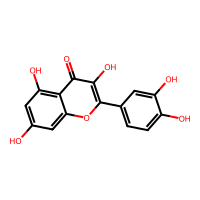
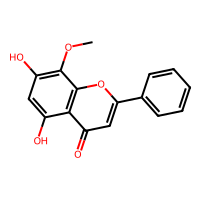
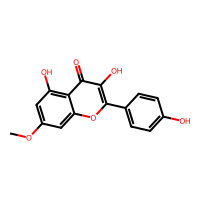
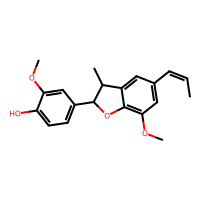
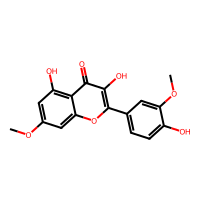
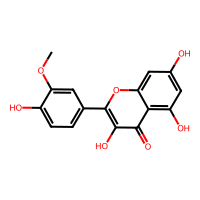
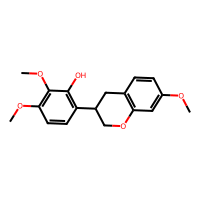
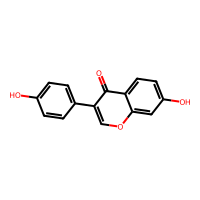
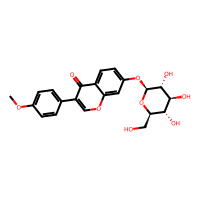
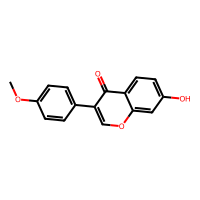
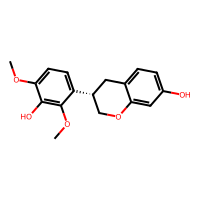
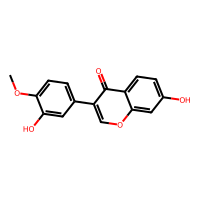
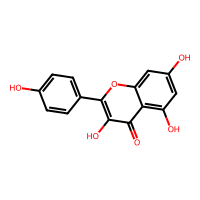
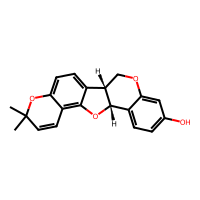
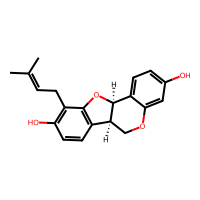
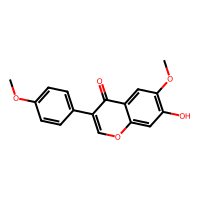
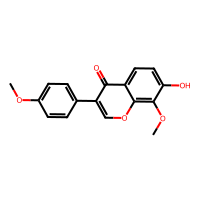
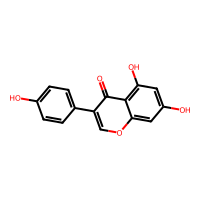
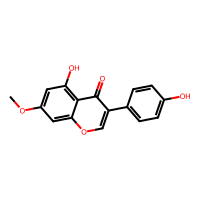
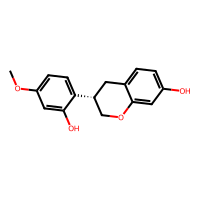
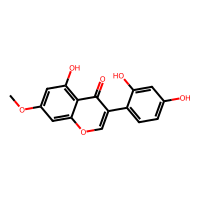
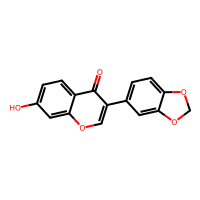
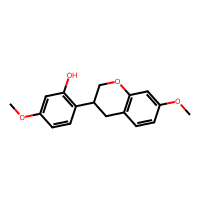
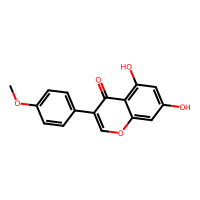
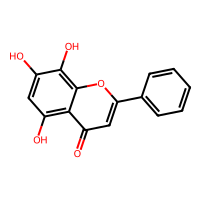
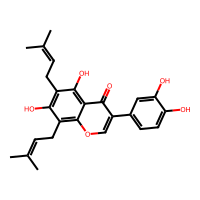
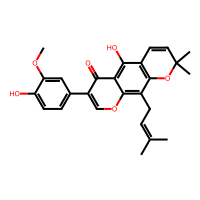
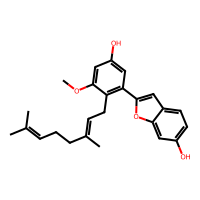
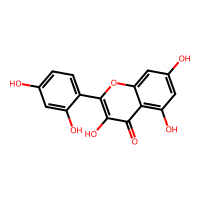
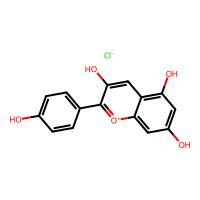
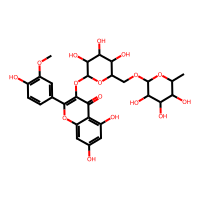
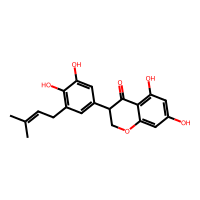
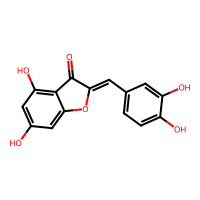
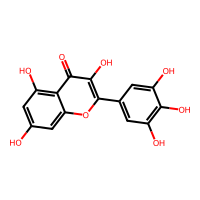
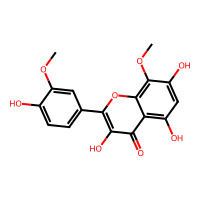
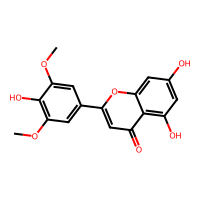
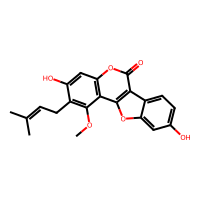
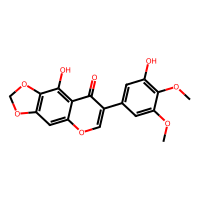
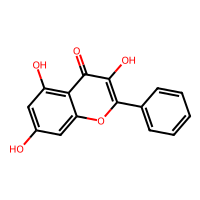
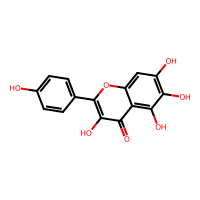
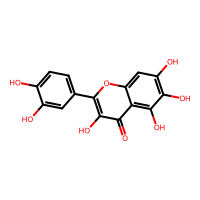
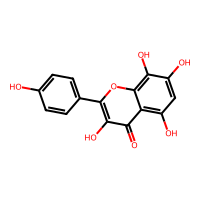
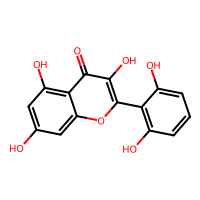
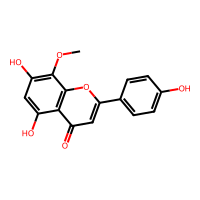
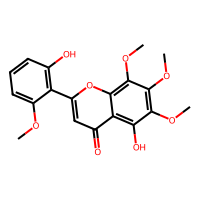
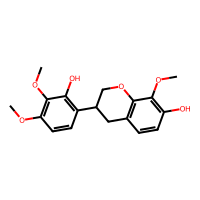
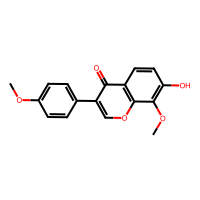
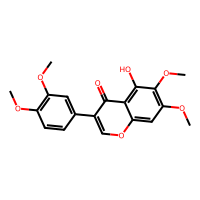
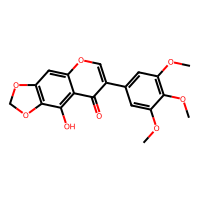
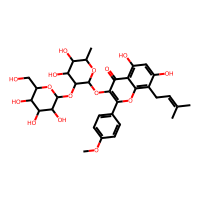
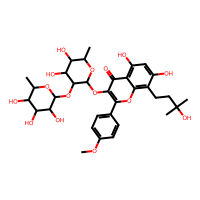
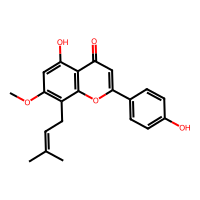
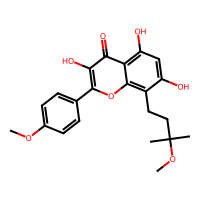
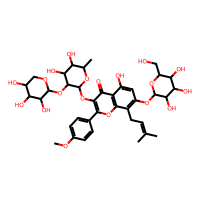
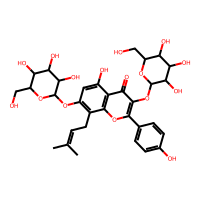
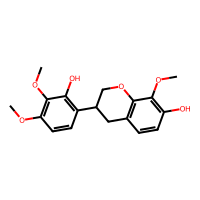
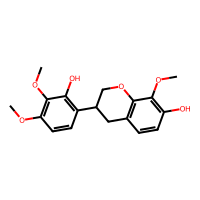
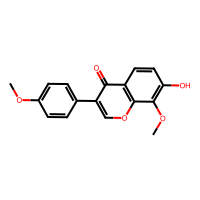
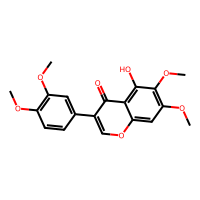
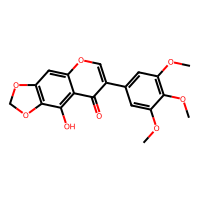
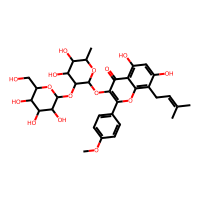
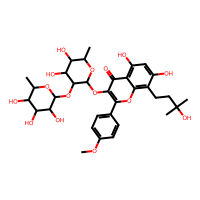
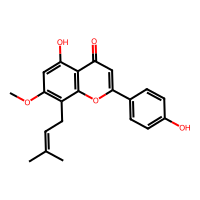
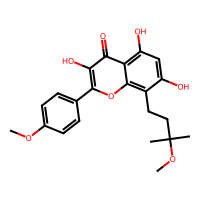
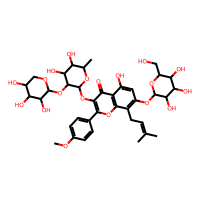
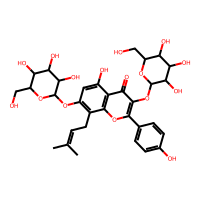
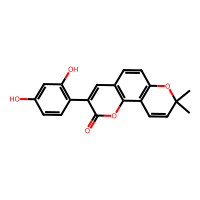
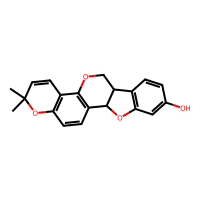
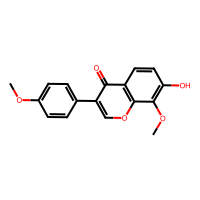
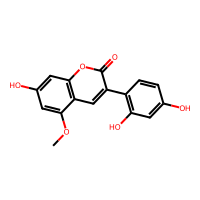
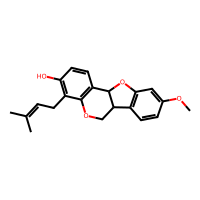
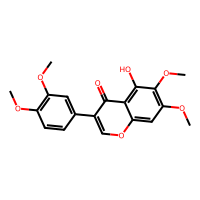
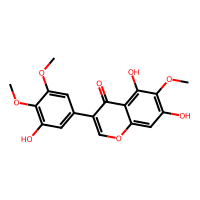
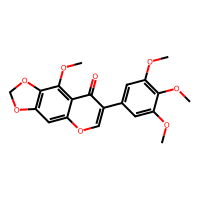
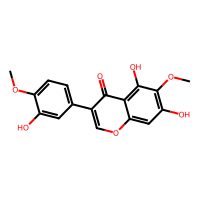
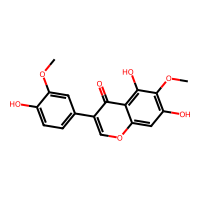
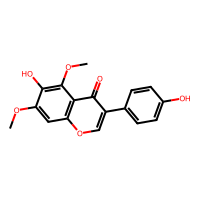
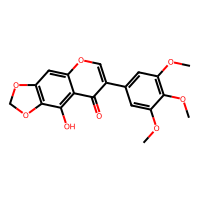
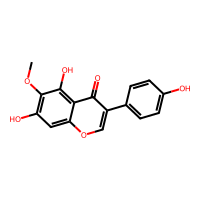
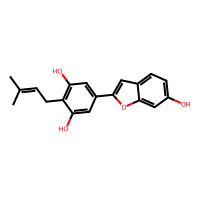
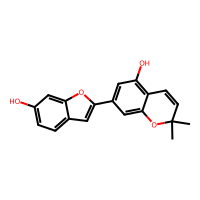
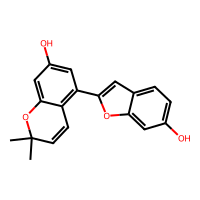
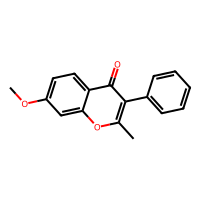
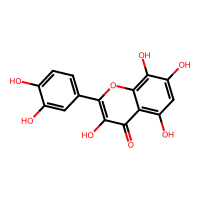
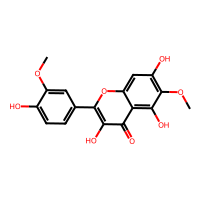
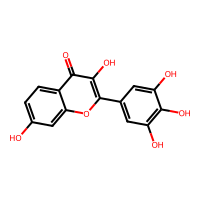
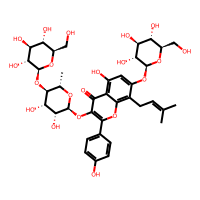
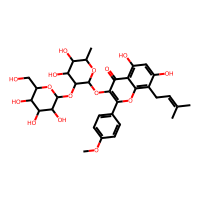
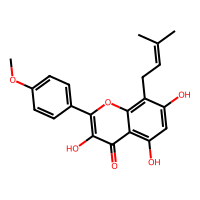
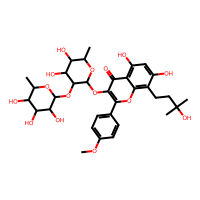
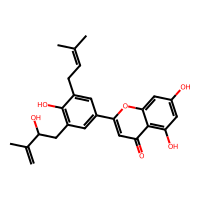
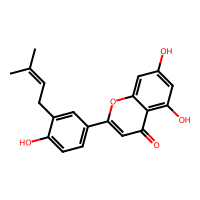
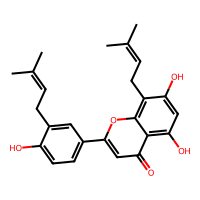
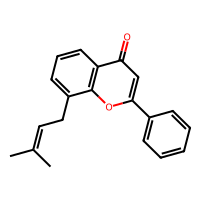
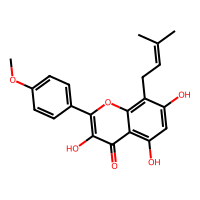
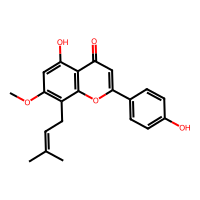
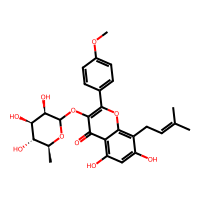
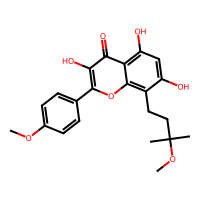
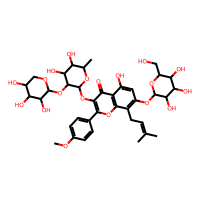
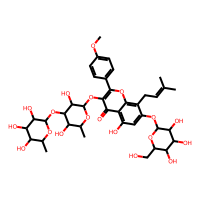
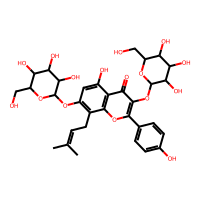
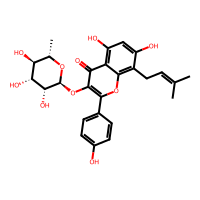
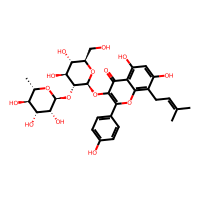
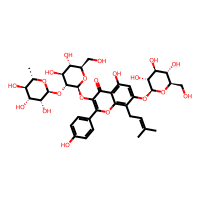
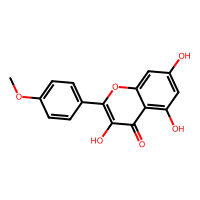
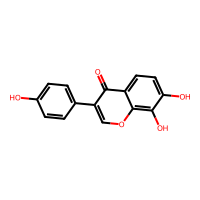
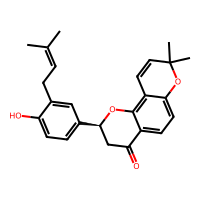
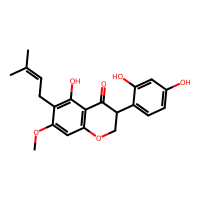
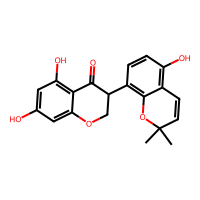
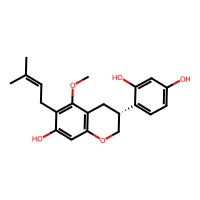
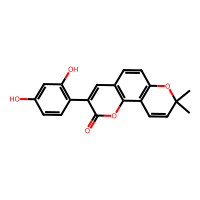
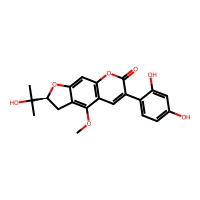
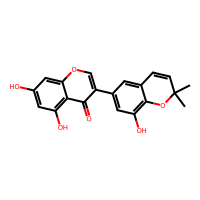
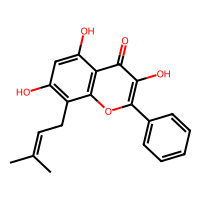
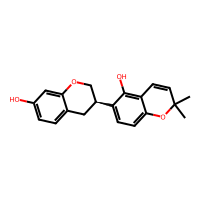
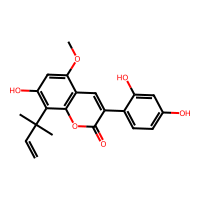
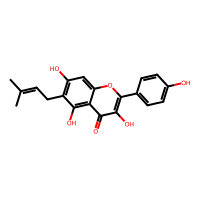
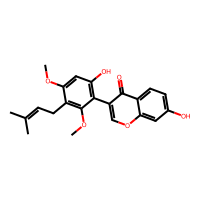
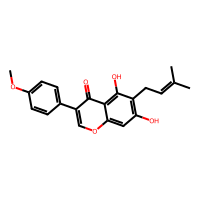
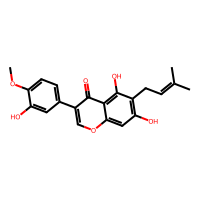
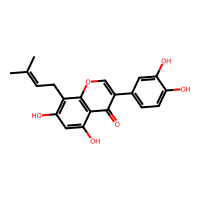
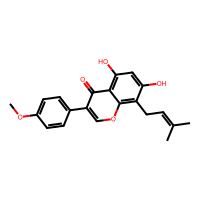
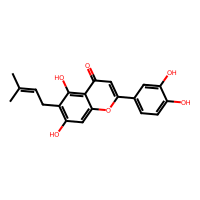
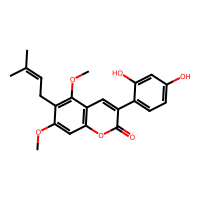
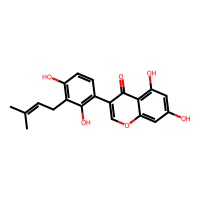
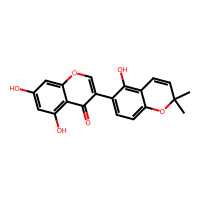
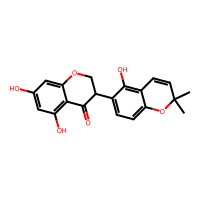
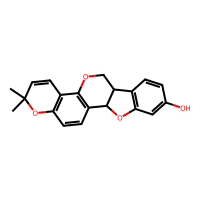
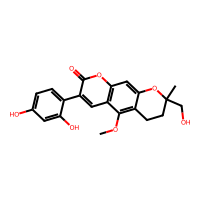
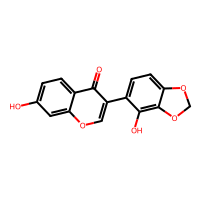
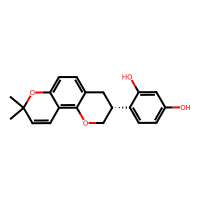
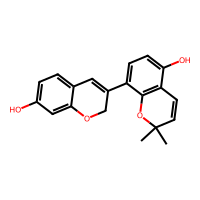
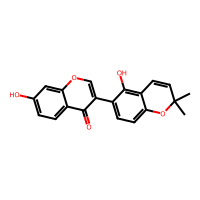
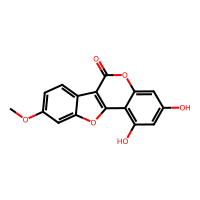
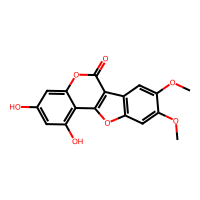
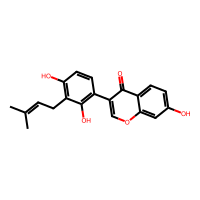
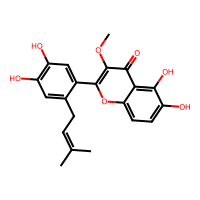
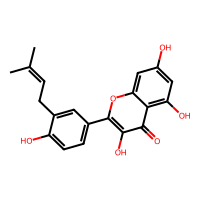
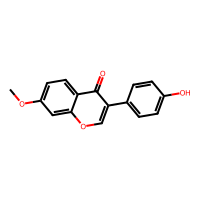
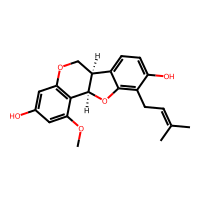
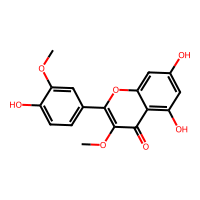
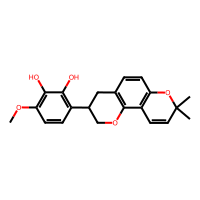
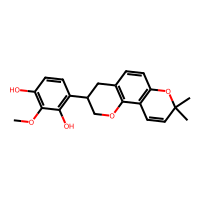
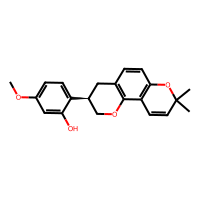
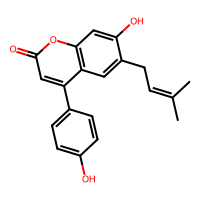
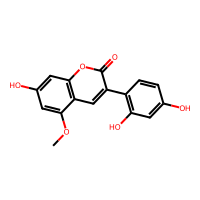
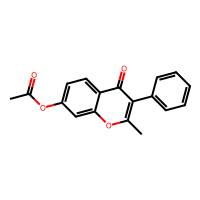
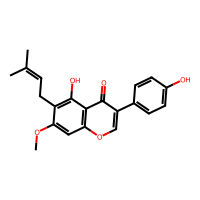
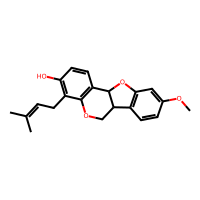
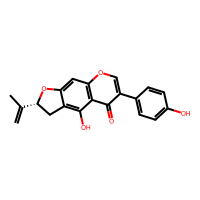
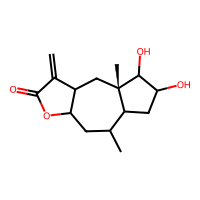
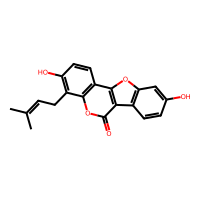
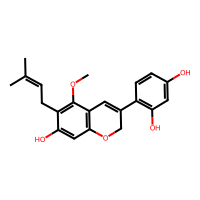
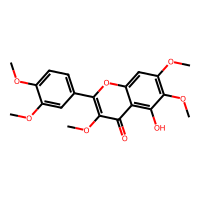
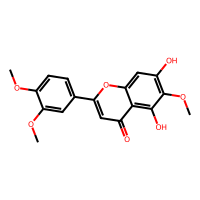
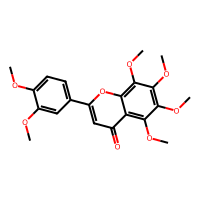
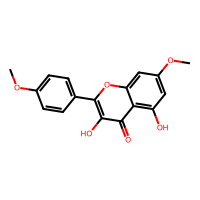
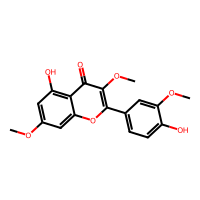
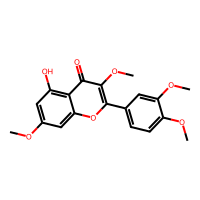
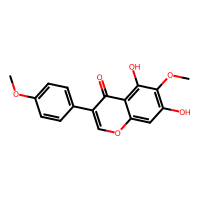
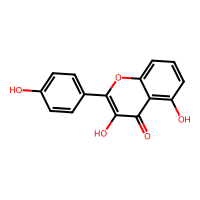
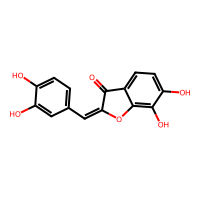
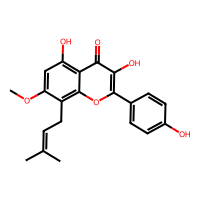
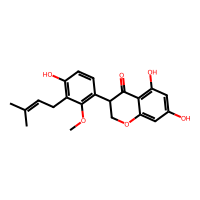
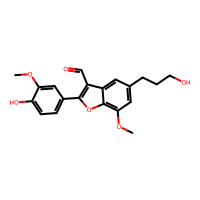
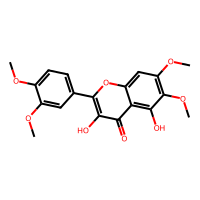
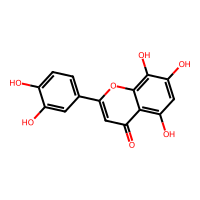
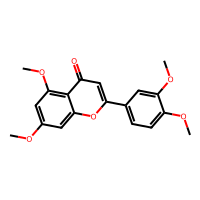
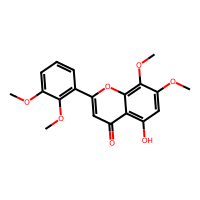
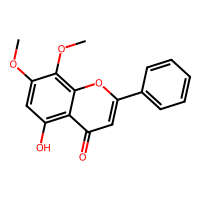
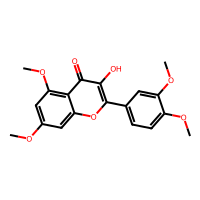
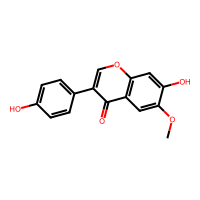
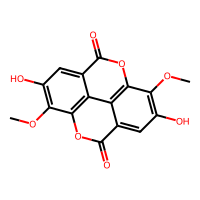
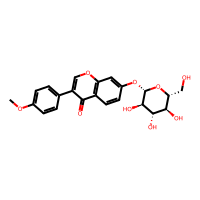
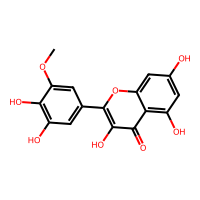
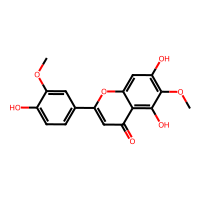
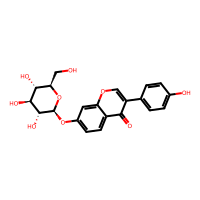
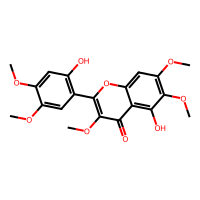
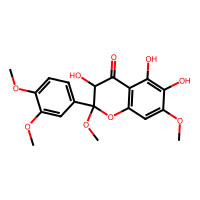
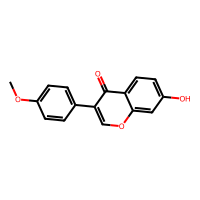
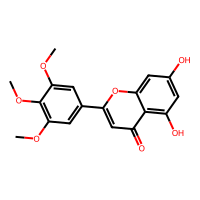
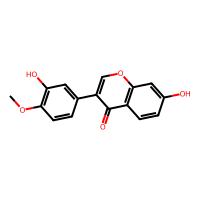
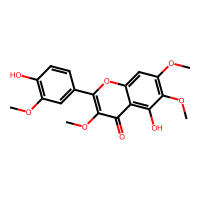
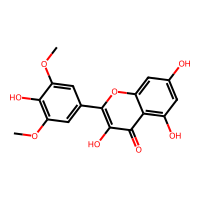
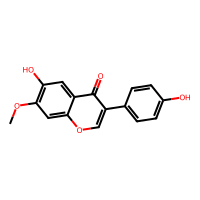
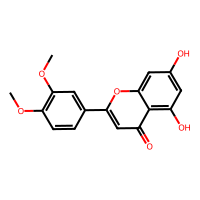
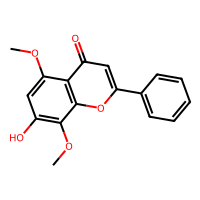
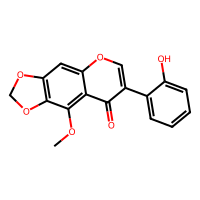
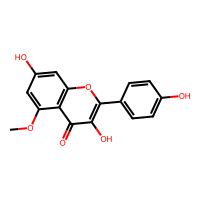
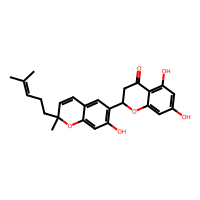
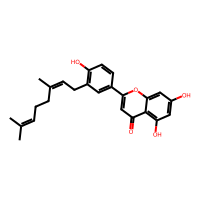
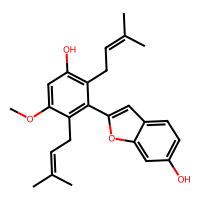
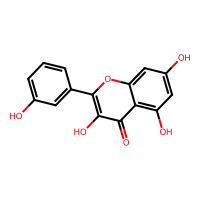
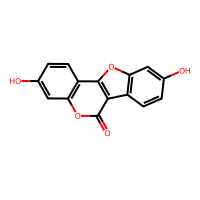
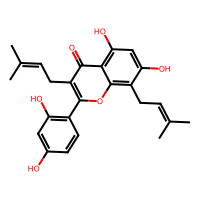
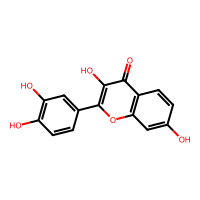
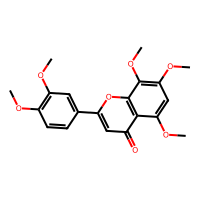
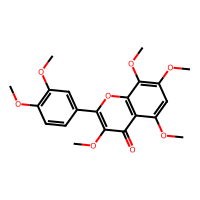
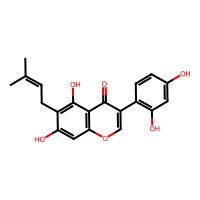
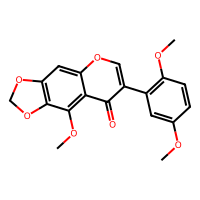
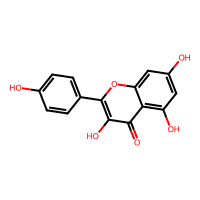
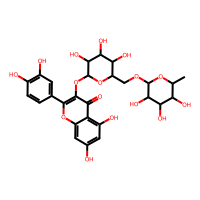
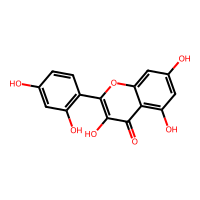
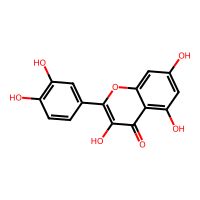

In [19]:
df